In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('crossvalidation_bert_03102020.csv')

In [63]:

df['crossval_mean'] = df[df.columns[5:25]].mean(axis=1)
df['crossval_std'] = df[df.columns[5:25]].std(axis=1)
df

,kingdom,type,metric,window,SignalP,BERT,T0V1,T0V2,T0V3,T0V4,...,T3V0,T3V1,T3V2,T3V4,T4V0,T4V1,T4V2,T4V3,crossval_mean,crossval_std
0,ARCHAEA,SP,mcc2,NaN,0.933,0.887,0.831005,0.831005,0.653650,0.653650,...,0.946535,1.000000,1.000000,1,0.887151,0.887151,0.887151,0.887151,0.881059,0.097962
1,ARCHAEA,SP,mcc1,NaN,0.938,0.898,0.820100,0.820100,0.705313,0.705313,...,1.000000,1.000000,1.000000,1,0.877058,0.877058,0.877058,0.877058,0.893329,0.087134
2,ARCHAEA,SP,recall,0.0,0.683,0.617,0.583333,0.500000,0.333333,0.333333,...,0.833333,0.750000,0.833333,0.75,0.583333,0.666667,0.583333,0.583333,0.611421,0.154666
3,ARCHAEA,SP,precision,0.0,0.707,0.932,0.875000,0.857143,0.800000,0.800000,...,0.909091,1.000000,1.000000,1,1.000000,1.000000,1.000000,1.000000,0.925283,0.083586
4,ARCHAEA,SP,recall,1.0,0.767,0.721,0.666667,0.583333,0.416667,0.416667,...,0.916667,0.916667,0.916667,0.916666667,0.750000,0.750000,0.750000,0.750000,0.709000,0.160201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,POSITIVE,TAT,precision,1.0,0.800,0.945,0.750000,1.000000,1.000000,1.000000,...,0.857143,1.000000,1.000000,1,0.937500,1.000000,0.933333,0.937500,0.942954,0.062190
95,POSITIVE,TAT,recall,2.0,0.850,0.750,0.684211,0.684211,0.684211,0.684211,...,0.684211,0.736842,0.894737,0.684210526,0.894737,0.842105,0.842105,0.894737,0.745845,0.099635
96,POSITIVE,TAT,precision,2.0,0.848,0.952,0.812500,1.000000,1.000000,1.000000,...,0.866667,1.000000,1.000000,1,0.944444,1.000000,0.941176,0.944444,0.949557,0.050691
97,POSITIVE,TAT,recall,3.0,0.883,0.803,0.736842,0.789474,0.684211,0.684211,...,0.842105,0.842105,1.000000,0.842105263,0.894737,0.894737,0.894737,0.947368,0.792956,0.103034


### MCC

Text(0.5, 1.0, 'MCC 2')

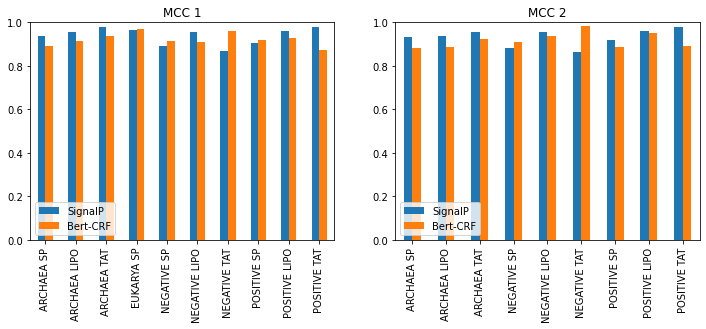

In [89]:
plt.figure(figsize = (12,4))

ax= plt.subplot(1,2,1)

df_plot = df.loc[df['metric'] == 'mcc1'][['kingdom', 'type','SignalP', 'crossval_mean']]#, 'crossval_std']]
df_plot = df_plot.set_index(df_plot['kingdom'] + ' ' + df_plot['type'])

df_plot = df_plot.rename({'crossval_mean': 'Bert-CRF'}, axis =1)

df_plot.plot(kind='bar', ax=ax, ylim =(0,1)).legend(loc='lower left')
plt.title('MCC 1')

ax=plt.subplot(1,2,2)

df_plot = df.loc[df['metric'] == 'mcc2'][['kingdom', 'type','SignalP', 'crossval_mean']]#, 'crossval_std']]
df_plot = df_plot.set_index(df_plot['kingdom'] + ' ' + df_plot['type'])

df_plot = df_plot.rename({'crossval_mean': 'Bert-CRF'}, axis =1)

df_plot.plot(kind='bar', ax=ax, ylim =(0,1)).legend(loc='lower left')
plt.title('MCC 2')

#plt.tight_layout()

### CS Recall

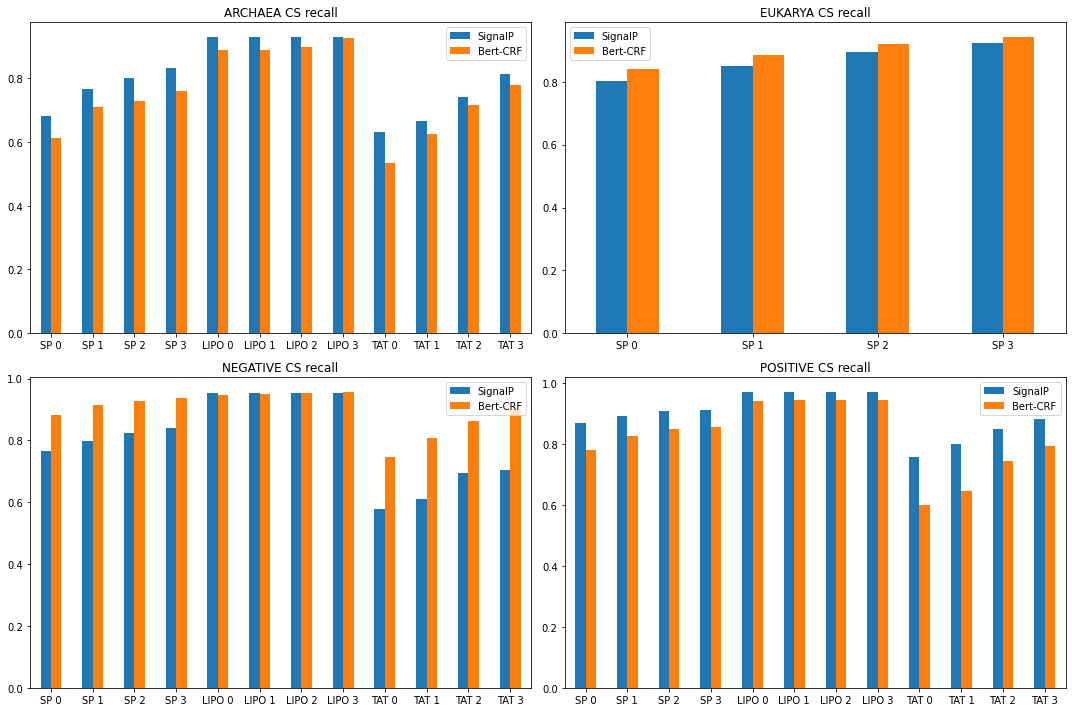

In [128]:
df_plot = df.loc[df['metric'] == 'recall'][['kingdom', 'type', 'window', 'SignalP', 'crossval_mean']]#, 'crossval_std']]
df_plot = df_plot.set_index(df_plot['type'] + ' ' + df_plot['window'].astype(int).astype(str))

df_plot = df_plot.rename({'crossval_mean': 'Bert-CRF'}, axis =1)

plt.figure(figsize=(15,10))
for idx, kingdom in enumerate(df_plot['kingdom'].unique()):
    ax = plt.subplot(2,2,idx+1)
    df_plot.loc[df_plot['kingdom'] == kingdom][['SignalP', 'Bert-CRF']].plot(kind='bar', ax = ax, title= kingdom + ' CS recall', rot=0)

plt.tight_layout()
#df_plot[['SignalP', 'Bert-CRF']].plot(kind='bar')

### CS Precision

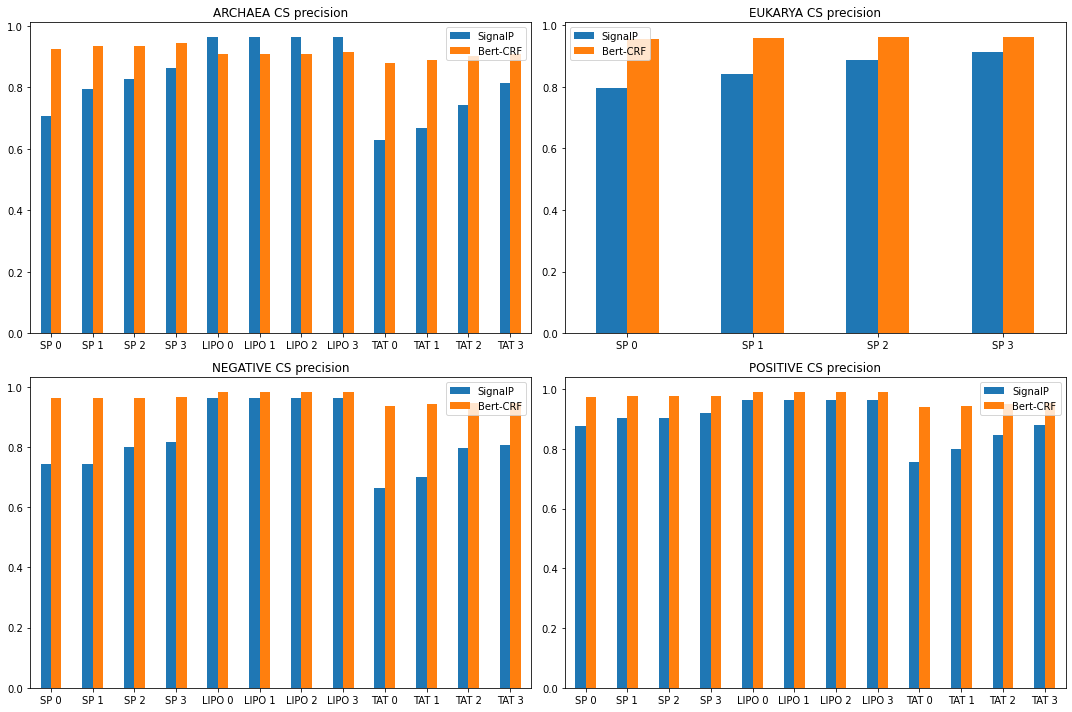

In [131]:
df_plot = df.loc[df['metric'] == 'precision'][['kingdom', 'type', 'window', 'SignalP', 'crossval_mean']]#, 'crossval_std']]
df_plot = df_plot.set_index(df_plot['type'] + ' ' + df_plot['window'].astype(int).astype(str))

df_plot = df_plot.rename({'crossval_mean': 'Bert-CRF'}, axis =1)

plt.figure(figsize=(15,10))
for idx, kingdom in enumerate(df_plot['kingdom'].unique()):
    ax = plt.subplot(2,2,idx+1)
    df_plot.loc[df_plot['kingdom'] == kingdom][['SignalP', 'Bert-CRF']].plot(kind='bar', ax = ax, title= kingdom + ' CS precision', rot=0)

plt.tight_layout()
#df_plot[['SignalP', 'Bert-CRF']].plot(kind='bar')